<h1><b>Importing Libraries</h1>

In [1]:
%load_ext cuml.accel

cuML: Accelerator installed.


In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt
import gc

<h2><b> Training the Model

In [3]:
X = pd.read_parquet("X_processed.parquet")
y = pd.read_parquet("y_processed.parquet")

if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

del X, y
gc.collect()


0

In [5]:
classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

print("Training Random Forest with optimized manual parameters...")
classifier.fit(X_train, y_train)

Training Random Forest with optimized manual parameters...


RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

<h2><b> Testing the model

In [6]:
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("ROC-AUC Score : ", roc_auc)
print("F1 Score : ", f1)
print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)

ROC-AUC Score :  0.9167351105464727
F1 Score :  0.5381429064549534
Accuracy :  0.9773427710231314
Precision :  0.938591210114389
Recall :  0.3772078393418824


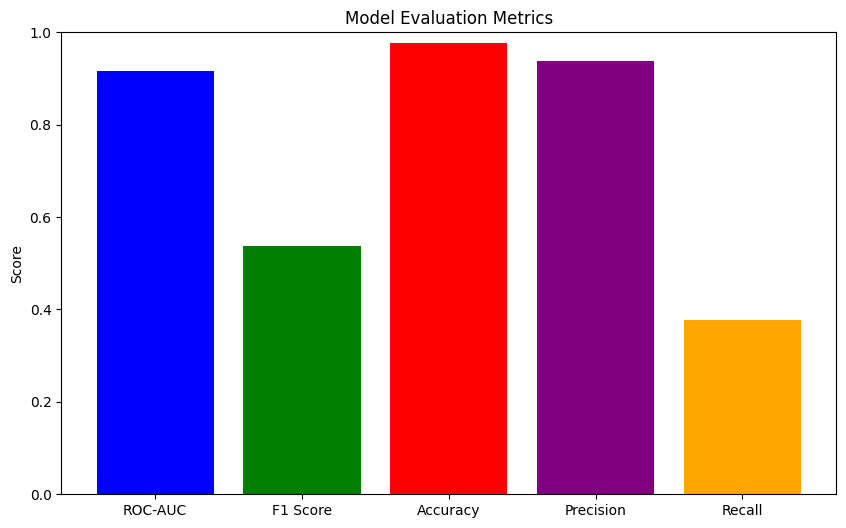

In [7]:
metrics = {
    'ROC-AUC': roc_auc,
    'F1 Score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()